#POT and livetime calculation


#Plot
This is a plot 

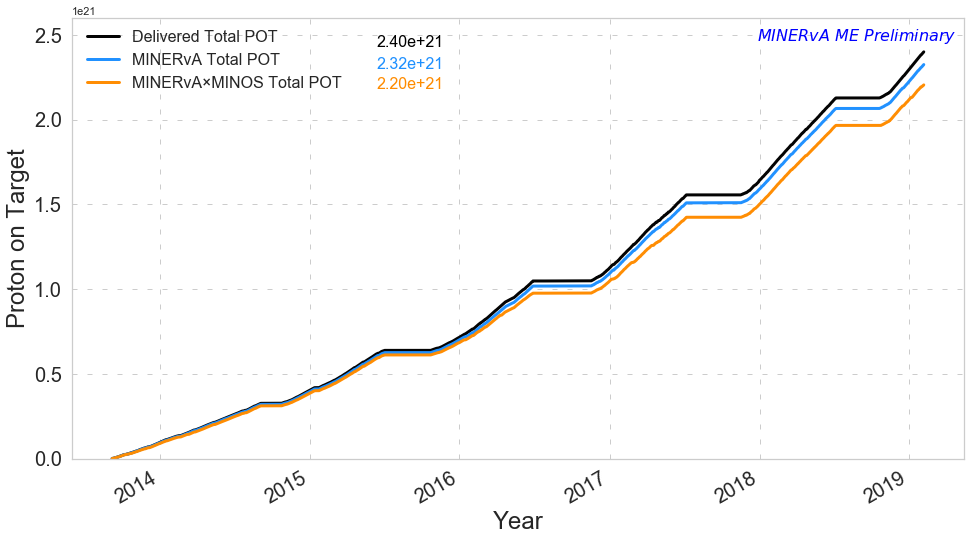

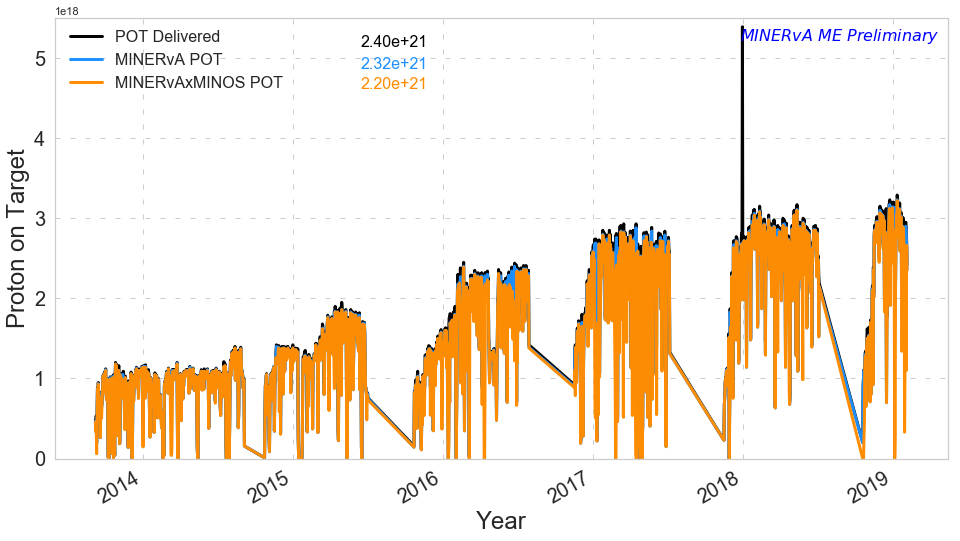

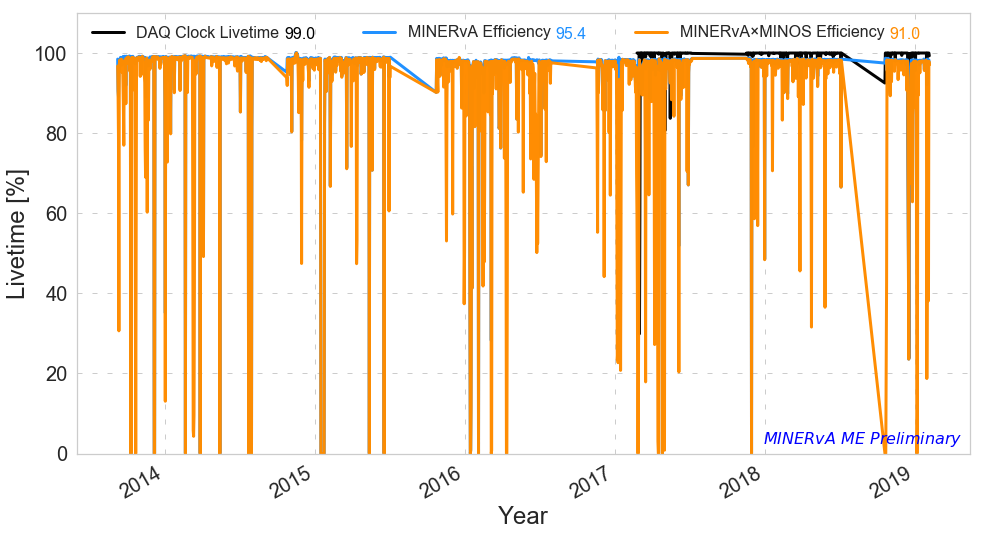

In [567]:
# Author: Nuruzzaman
# Date:   02/20/2019
# POT and livetime calculation

# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import cycle, islice
%matplotlib inline

sns.set(context='notebook', 
        style='whitegrid', 
        palette='deep', 
        font='sans-serif', 
        font_scale=1, 
        color_codes=False, 
        rc=None)

df = pd.read_csv('data/neutrino.csv', skiprows=1)
df.columns = ['Date','MINERvA POT',
              'MINERvAxMINOS POT','POT Delivered',
              'MINERvA Efficiency','MINERvA×MINOS Efficiency',
              'DAQ Clock Livetime','MINERvA Total POT',
              'MINERvA×MINOS Total POT','Delivered Total POT']

df.Date = pd.to_datetime(df.Date)
df.set_index('Date', inplace=True)

#print(df.sum())
calc_total_pot = df['Delivered Total POT'].iloc[-1]
calc_minerva_pot = df['MINERvA Total POT'].iloc[-1]
calc_minervaminos_pot = df['MINERvA×MINOS Total POT'].iloc[-1]
calc_avg_daq = df['DAQ Clock Livetime'].mean()
calc_avg_minerva = df['MINERvA Efficiency'].mean()
calc_avg_minervaminos = df['MINERvA×MINOS Efficiency'].mean()
#print('%.2f %.2f %.2f'%(calc_avg_daq,calc_avg_minerva,calc_avg_minervaminos))

my_color = list(islice(cycle(['black','dodgerblue','darkorange','blue','red','green','magenta']), None, len(df)))
my_linewidth = [3, 1, 2, 4]
my_font = [10,20,25,30,35,40]
my_fig_size = [10,20,25,30,35,40]
my_alpha = [0.99,0.50,0.25]
my_legend = [0.50,16,2.0,2]
my_legend_loc = [0.01, 0.82,0.01, 0.92]
my_prelim = [0.72, 0.845,0.72, 0.215]
my_text_loc = [0.39, 0.835, 0.802, 0.770, 0.305, 0.540, 0.830, 0.840]

#ax = df.plot(x='Year', y='Delivered Total POT', color='DarkBlue', label='Group 1');

# Plot: total collected POT
df[['Delivered Total POT','MINERvA Total POT','MINERvA×MINOS Total POT']].plot(
    figsize=(my_fig_size[1]*0.8,my_fig_size[1]*0.45),
    alpha=my_alpha[0],
    linewidth=my_linewidth[0], 
    fontsize=my_fig_size[1], 
    color=my_color)

plt.xlabel('Year', fontsize=my_fig_size[1]*1.2);
plt.ylabel('Proton on Target', fontsize=my_fig_size[1]*1.2);
plt.legend(fontsize=my_fig_size[1]*0.8, 
           labelspacing=my_legend[0], 
           facecolor='w',
           prop={'size': my_legend[1]}, 
           markerscale=my_legend[3], 
           loc=(my_legend_loc[0],my_legend_loc[1]), 
           handlelength=my_legend[2],
           frameon=False,
           fancybox=True) # using a size in points

#plt.text(2e16, 0.9e21, "test", {'color': 'C2', 'fontsize': 18}, va="top", ha="right")
plt.gcf().text(my_text_loc[0], my_text_loc[1], ('%.2e')%calc_total_pot, fontsize=my_fig_size[1]*0.8, color=my_color[0])
plt.gcf().text(my_text_loc[0], my_text_loc[2], ('%.2e')%calc_minerva_pot, fontsize=my_fig_size[1]*0.8, color=my_color[1])
plt.gcf().text(my_text_loc[0], my_text_loc[3], ('%.2e')%calc_minervaminos_pot, fontsize=my_fig_size[1]*0.8, color=my_color[2])
#plt.gcf().text(my_text_loc[0], my_text_loc[3], r'$22.9\times10^{20}$', fontsize=my_fig_size[1]*0.8, color=my_color[2])
#plt.grid(linestyle='--')

plt.gcf().text(my_prelim[0],my_prelim[1], r'$\it{MINERvA\ ME\ Preliminary}$', fontsize=my_fig_size[1]*0.8, color=my_color[3])

plt.ylim((0,2.6e21)) 
plt.grid(dashes=[5, 10])
plt.show()

# Plot: daily POT
df[['POT Delivered','MINERvA POT','MINERvAxMINOS POT']].plot(
    figsize=(my_fig_size[1]*0.8,my_fig_size[1]*0.45),
    alpha=my_alpha[0],
    linewidth=my_linewidth[0], 
    fontsize=my_fig_size[1], 
    color=my_color)

plt.xlabel('Year', fontsize=my_fig_size[1]*1.2);
plt.ylabel('Proton on Target', fontsize=my_fig_size[1]*1.2);
plt.legend(fontsize=my_fig_size[1]*0.8, 
           labelspacing=my_legend[0], 
           facecolor='w',
           prop={'size': my_legend[1]}, 
           markerscale=my_legend[3], 
           loc=(my_legend_loc[0],my_legend_loc[1]), 
           handlelength=my_legend[2],
           frameon=False,
           fancybox=True) # using a size in points

plt.gcf().text(my_text_loc[0], my_text_loc[1], ('%.2e')%calc_total_pot, fontsize=my_fig_size[1]*0.8, color=my_color[0])
plt.gcf().text(my_text_loc[0], my_text_loc[2], ('%.2e')%calc_minerva_pot, fontsize=my_fig_size[1]*0.8, color=my_color[1])
plt.gcf().text(my_text_loc[0], my_text_loc[3], ('%.2e')%calc_minervaminos_pot, fontsize=my_fig_size[1]*0.8, color=my_color[2])

plt.gcf().text(my_prelim[0],my_prelim[1], r'$\it{MINERvA\ ME\ Preliminary}$', fontsize=my_fig_size[1]*0.8, color=my_color[3])

plt.ylim((0,5.5e18)) 
plt.grid(dashes=[5, 10])
plt.show()

# Plot: Livetime 
df[['DAQ Clock Livetime','MINERvA Efficiency','MINERvA×MINOS Efficiency']].plot(
    figsize=(my_fig_size[1]*0.8,my_fig_size[1]*0.45),
    alpha=my_alpha[0], 
    linewidth=my_linewidth[0], 
    fontsize=my_fig_size[1], 
    color=my_color)

plt.xlabel('Year', fontsize=my_fig_size[1]*1.2);
plt.ylabel('Livetime [%]', fontsize=my_fig_size[1]*1.2);
plt.legend(fontsize=my_fig_size[1]*0.8, 
           labelspacing=my_legend[0], ncol=3, bbox_to_anchor=(0., 0.186, 0.92, .802), mode='expand',
           facecolor='w',
           prop={'size': my_legend[1]}, 
           markerscale=my_legend[3], 
           loc=(my_legend_loc[2],my_legend_loc[3]), 
           handlelength=my_legend[2],
           frameon=False,
           fancybox=True) # using a size in points

plt.gcf().text(my_text_loc[4], my_text_loc[7], ('%.1f')%calc_avg_daq, fontsize=my_fig_size[1]*0.8, color=my_color[0])
plt.gcf().text(my_text_loc[5], my_text_loc[7], ('%.1f')%calc_avg_minerva, fontsize=my_fig_size[1]*0.8, color=my_color[1])
plt.gcf().text(my_text_loc[6], my_text_loc[7], ('%.1f')%calc_avg_minervaminos, fontsize=my_fig_size[1]*0.8, color=my_color[2])

plt.gcf().text(my_prelim[0],my_prelim[3], r'$\it{MINERvA\ ME\ Preliminary}$', fontsize=my_fig_size[1]*0.8, color=my_color[3])

plt.ylim((0,110.0)) 
plt.grid(dashes=[5, 10])
plt.show()



#ax.set_axis_bgcolor("lightslategray")
#ax.set_facecolor('white')
#ax.legend(["AAA", "BBB","PP"]);

#fig = plt.figure(facecolor='white', edgecolor='black')
#ax = plt.axes()        
#ax.yaxis.grid(color='red', alpha=0.1, linestyle='--', linewidth=1) # horizontal lines
#ax.xaxis.grid(color='grey', alpha=0.5, linestyle='-.', linewidth=2) # vertical lines

#Checking 
if this works